In [1]:
#data used can be found: https://www.10xgenomics.com/datasets/20-k-mixture-of-nsclc-dt-cs-from-7-donors-3-v-3-1-3-1-standard-6-1-0

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Dataset Overview</div>
    <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/03/LungCACXR.PNG" width="400" style="margin-top: 20px;">
</center>

Non-small cell lung cancer (NSCLC) dissociated tumor cells from 7 donors were obtained from Discovery Life Sciences. Cells were labeled with TotalSeq™-B Human TBNK Cocktail (BioLegend). Each donor was CellPlexed and pooled at equal proportions. Viable cells in the pool were identified by 7AAD staining and sorted via FACS.

Gene Expression and CellPlex libraries were generated from ~33,000 cells as described in the Chromium Single Cell 3' Reagent Kits User Guide (v3.1 Chemistry Dual Index) with Feature Barcode technology for Cell Surface Protein and Cell Multiplexing (CG000390 Rev B) using the Chromium X and sequenced on an Illumina NovaSeq 6000 to a read depth of approximately 70,000 mean reads per cell for Gene Expression and 25,000 mean reads per cell for CellPlex.

Paired-end, dual indexing:

Read 1: 28 cycles (16 bp barcode, 12 bp UMI)
i5 index: 10 cycles (sample index)
i7 index: 10 cycles (sample index)
Read 2: 90 cycles (transcript)
Analysis parameters used: expect-cells=20000

Pooled multiplexed sample - Key metrics:

Estimated number of cells: 16,443
Cells assigned to a sample: 12,231


<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Load Libraries

In [4]:
#Read in libraries
library(Seurat)
library(tidyverse)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Load in Dataset

In [5]:
setwd("/Users/freddymappin/Desktop/ScRNA")

# Load the NSCLC dataset
nsclc.sparse.m <- Read10X_h5(filename = '/Users/freddymappin/Desktop/ScRNA/20k_NSCLC_DTC_3p_nextgem_Multiplex_count_raw_feature_bc_matrix.h5')
str(nsclc.sparse.m)
cts <-  nsclc.sparse.m$`Gene Expression`

Genome matrix has multiple modalities, returning a list of matrices for this genome



List of 3
 $ Gene Expression     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:75593104] 184 7502 9727 10485 13480 21902 24894 25667 28658 31547 ...
  .. ..@ p       : int [1:3862364] 0 0 0 12 14 14 21 21 25 25 ...
  .. ..@ Dim     : int [1:2] 36601 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:36601] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "AAACCCAAGAAACCCA-1" "AAACCCAAGAAACCCG-1" ...
  .. ..@ x       : num [1:75593104] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ Antibody Capture    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1159120] 8 4 3 1 1 0 3 0 3 1 ...
  .. ..@ p       : int [1:3862364] 0 0 0 0 0 0 1 1 1 2 ...
  .. ..@ Dim     : int [1:2] 9 3862363
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:9] "CD3" "CD4.1" "CD8" "CD11c" ...
  .. .. ..$ : chr [1:3862363] "AAACCCAAGAAACACT-1" "AAACCCAAGAAACCAT-1" "

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Initialize Seurat Object

In [4]:
# Initialize the Seurat object with the raw (non-normalized data).
nsclc.seurat.obj <- CreateSeuratObject(counts = cts, project = "NSCLC", min.cells = 3, min.features = 200)
str(nsclc.seurat.obj)
nsclc.seurat.obj

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 1
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:63710619] 59 64 76 77 89 98 142 204 270 312 ...
  .. .. .. .. .. .. ..@ p       : int [1:42082] 0 789 1040 1401 1649 1950 8346 12231 12456 12884 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 29552 42081
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:63710619] 1 2 1 2 1 1 1 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ cells     :Formal class 'LogMap' [package "SeuratObject"] with 1 slot
  .. .. .. .. .. ..@ .Data: logi [1:42081, 1] TRUE TRUE TRUE TRUE TRUE TRUE ...
  .. .. .. .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. .. .. .. ..$ 

An object of class Seurat 
29552 features across 42081 samples within 1 assay 
Active assay: RNA (29552 features, 0 variable features)
 1 layer present: counts

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Quality Control

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACCCAAGAATTTGG-1,NSCLC,1333,789
AAACCCAAGAGATTCA-1,NSCLC,295,251
AAACCCAAGATTGACA-1,NSCLC,470,361
AAACCCAAGCAAATCA-1,NSCLC,296,248
AAACCCAAGCAATTCC-1,NSCLC,364,301
AAACCCAAGCACTGGA-1,NSCLC,40874,6396
AAACCCAAGCATGGGT-1,NSCLC,13137,3885
AAACCCAAGCCGTTGC-1,NSCLC,260,225
AAACCCAAGCCTCCAG-1,NSCLC,4110,428


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACCCAAGAATTTGG-1,NSCLC,1333,789,11.102776
AAACCCAAGAGATTCA-1,NSCLC,295,251,4.406780
AAACCCAAGATTGACA-1,NSCLC,470,361,2.127660
AAACCCAAGCAAATCA-1,NSCLC,296,248,2.364865
AAACCCAAGCAATTCC-1,NSCLC,364,301,2.472527
AAACCCAAGCACTGGA-1,NSCLC,40874,6396,5.766502
AAACCCAAGCATGGGT-1,NSCLC,13137,3885,2.542437
AAACCCAAGCCGTTGC-1,NSCLC,260,225,1.923077
AAACCCAAGCCTCCAG-1,NSCLC,4110,428,7.858881


Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."
`geom_smooth()` using formula = 'y ~ x'


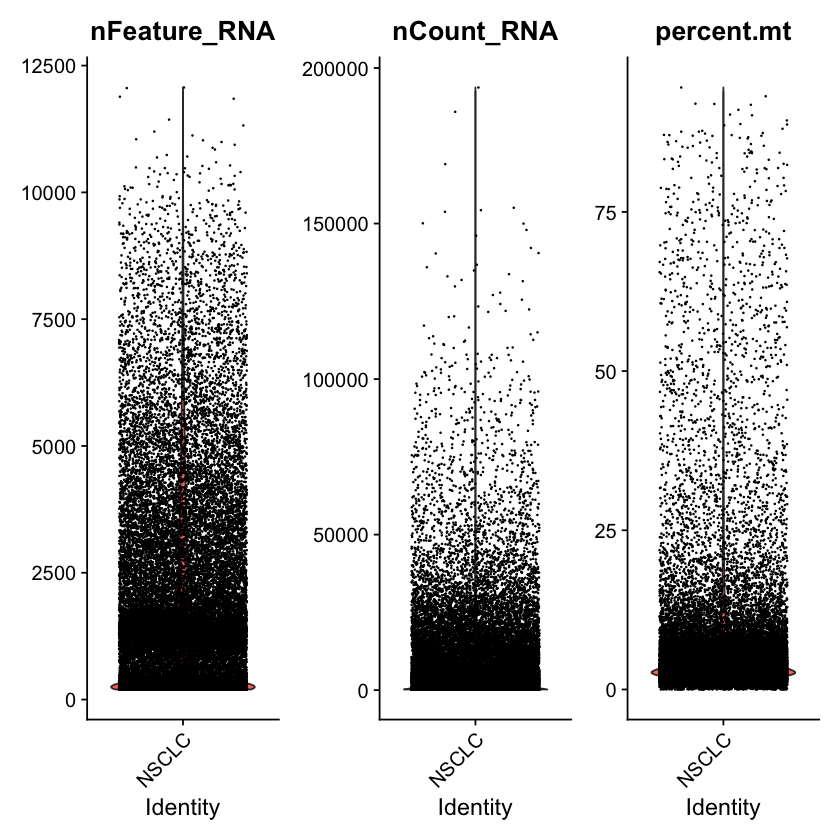

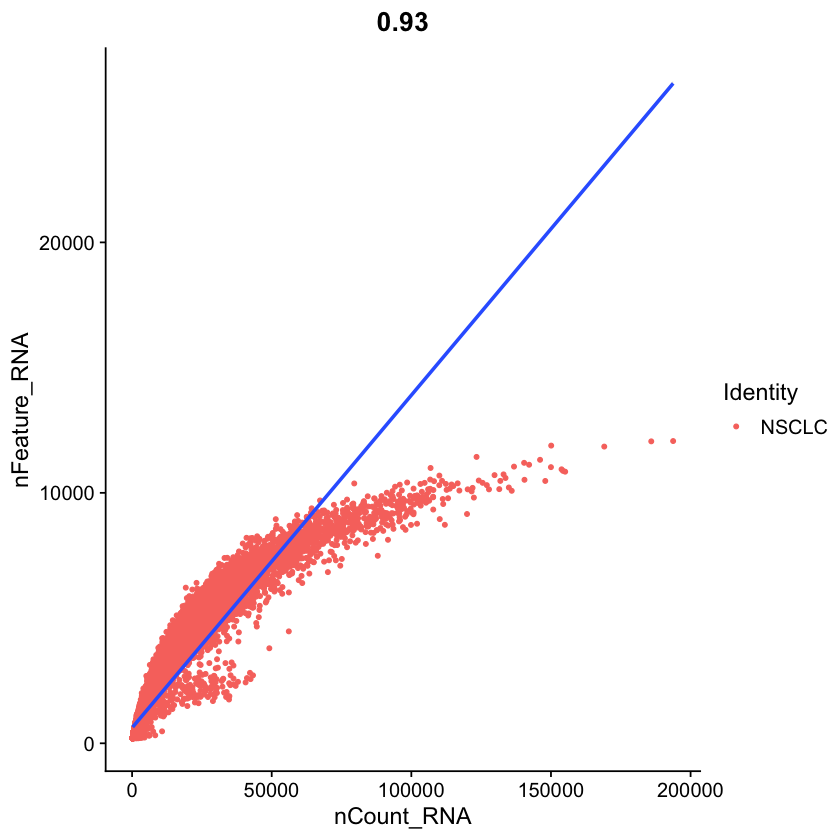

In [5]:
View(nsclc.seurat.obj@meta.data)
# % MT reads
nsclc.seurat.obj[["percent.mt"]] <- PercentageFeatureSet(nsclc.seurat.obj, pattern = "^MT-")
View(nsclc.seurat.obj@meta.data)

VlnPlot(nsclc.seurat.obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
FeatureScatter(nsclc.seurat.obj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA") +
  geom_smooth(method = 'lm')

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Filtering

In [6]:
nsclc.seurat.obj <- subset(nsclc.seurat.obj, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & 
                          percent.mt < 5)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
     Normalize data

In [7]:
#nsclc.seurat.obj <- NormalizeData(nsclc.seurat.obj, normalization.method = "LogNormalize", scale.factor = 10000)
# OR
nsclc.seurat.obj <- NormalizeData(nsclc.seurat.obj)
str(nsclc.seurat.obj)


Normalizing layer: counts



Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 2
  .. .. .. .. ..$ counts:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:15577418] 142 207 566 625 659 961 1016 1164 1183 1204 ...
  .. .. .. .. .. .. ..@ p       : int [1:24709] 0 251 612 860 1161 1386 1601 1838 2105 2397 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 29552 24708
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:15577418] 1 1 1 1 1 1 2 1 1 1 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data  :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:15577418] 142 207 566 625 659 961 1016 1164 1183 1204 ...
  .. .. .. .. .. .. ..@ p       : int [1:24709] 0 251 612 86

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
     Identify highly variable features

In [3]:
nsclc.seurat.obj <- FindVariableFeatures(nsclc.seurat.obj, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(nsclc.seurat.obj), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(nsclc.seurat.obj)
LabelPoints(plot = plot1, points = top10, repel = TRUE)

ERROR: Error: object 'nsclc.seurat.obj' not found


<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
      Scaling

In [ ]:
all.genes <- rownames(nsclc.seurat.obj)
nsclc.seurat.obj <- ScaleData(nsclc.seurat.obj, features = all.genes)

str(nsclc.seurat.obj)

Centering and scaling data matrix



<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
       Linear dimensionality Reduction 

In [ ]:
nsclc.seurat.obj <- RunPCA(nsclc.seurat.obj, features = VariableFeatures(object = nsclc.seurat.obj))



In [ ]:
# visualize PCA results
print(nsclc.seurat.obj[["pca"]], dims = 1:5, nfeatures = 5)

In [ ]:
DimHeatmap(nsclc.seurat.obj, dims = 1, cells = 500, balanced = TRUE)

In [ ]:
# determine dimensionality of the data
ElbowPlot(nsclc.seurat.obj)


<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
       Clustering 

In [ ]:
nsclc.seurat.obj <- FindNeighbors(nsclc.seurat.obj, dims = 1:15)

# understanding resolution
nsclc.seurat.obj <- FindClusters(nsclc.seurat.obj, resolution = c(0.1,0.3, 0.5, 0.7, 1))
View(nsclc.seurat.obj@meta.data)

DimPlot(nsclc.seurat.obj, group.by = "RNA_snn_res.0.5", label = TRUE)

# setting identity of clusters
Idents(nsclc.seurat.obj)
Idents(nsclc.seurat.obj) <- "RNA_snn_res.0.1"
Idents(nsclc.seurat.obj)

# non-linear dimensionality reduction --------------
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages =
# 'umap-learn')
nsclc.seurat.obj <- RunUMAP(nsclc.seurat.obj, dims = 1:15)
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(nsclc.seurat.obj, reduction = "umap")